In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils_timeline_viz
from utils_timeline_viz import *
from utils_read_parsing import *
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 7, 4
from tabulate import tabulate
pd.options.mode.chained_assignment = None

# Cleaning and Exporting pre and post survey data

## Pre survey

In [2]:
def get_clean_pre_survey():
    pre = get_pre_survey()

    #cleaning up columns
    old_columns = list(pre.columns)
    new_columns = [c.split(']')[0].replace('[','') for c in old_columns]
    for i,(c,d) in enumerate(zip(new_columns,old_columns)):
        if new_columns.count(c)>1:
            new_columns[i] = d
        if ' | ' in d:
            new_columns[i] = c + '-' + d.split(' | ')[1]
    pre.columns = new_columns

    ids = set(get_students_to_analyze_log())

    def ids_pre_to_logs(studentid):
        if studentid in [5055169,5444164,9780165,7868168,6901162,561164,3981167,192168,5298166,1394167,4055131]:
            return studentid+10000000
        elif studentid == 12406816:
            return 12406161
        elif studentid == 18162136:
            return 18162165
        else:
            return studentid

    def ids_logs_to_pre(studentid):
        if studentid in [15055169,15444164,19780165,17868168,16901162,10561164,13981167,10192168,15298166,11394167,14055131]:
            return studentid-10000000
        elif studentid == 12406161:
            return 12406816
        elif studentid == 18162165:
            return 18162136
        else:
            return studentid

    ids_match_pre = set([ids_logs_to_pre(i) for i in ids])
    pre_analyzeable = pre[(pre['id'].isin(ids_match_pre))&(pre['Internal ID']!=86221654)]

    #convert all ids so they match ids in logs
    pre_analyzeable['sid'] = pre_analyzeable['id'].apply(lambda i: ids_pre_to_logs(i))

    def used_similar_or_same_sim(sim,answer):
        if sim in answer or 'both' in answer:
            return 1
        else:
            return 0
    convert_experience = {'1-2 (roughly)':1, '3-5 (roughly)':2, '6+ (roughly)':3, 'None':0}

    #quantify in an ordinal variable how much virtual lab experience they have
    pre_analyzeable['prior_number_virtual_labs'] = pre_analyzeable['prior_number_virtual_labs'].apply(lambda answer: convert_experience[answer])

    #binarize their familiarity with similar topic per sim
    pre_analyzeable['similar_L'] = pre_analyzeable['prio_sims_other'].apply(lambda answer: used_similar_or_same_sim('light',answer))
    pre_analyzeable['similar_C'] = pre_analyzeable['prio_sims_other'].apply(lambda answer: used_similar_or_same_sim('capacitor',answer))
    pre_analyzeable['same_L'] = pre_analyzeable['prior_sims_phet'].apply(lambda answer: used_similar_or_same_sim('Light',answer))
    pre_analyzeable['same_C'] = pre_analyzeable['prior_sims_phet'].apply(lambda answer: used_similar_or_same_sim('Capacitor',answer))
    return pre_analyzeable

COLUMNS = [u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory]',u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory]',u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory]',u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level physics labs]',u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level chemistry labs]','similar_L','similar_C','same_L','same_C',u'prior_number_virtual_labs',u'perceivedvalue.0-boring',u'perceivedvalue.1-productive',u'perceivedvalue.2-useless',u'perceivedvalue.3-engaging',u'taskinterpretation.0-investigate the basic mechanics of the topic at hand',u'taskinterpretation.1-design my own experiments that can help me understand the topic at hand',u'taskinterpretation.2-memorize information about the topic at hand',u'taskinterpretation.3-complete a certain number of  questions',u'taskinterpretation.4-develop scientific reasoning skills',u'pocc.0-learning the basic concepts',u'pocc.1-testing my ideas and theories',u'pocc.2-answering given questions',u'pocc.3-memorizing key information',u'pocc.4-exploring the topic','sid']

pre = get_clean_pre_survey()[COLUMNS]
# pre.drop(['Collector','Completion Time','Created At','GET Variables','IP Address','Internal ID','Invite Code','Invite Email','Invite Name','Language','Location','Number of Saves','Page 1 | Time on Page','Page 2 | Time on Page','Page 3 | Time on Page','Page 4 | Time on Page','Page 5 | Time on Page','Page 6 | Time on Page','Page 7 | Time on Page','Page 8 | Time on Page','Page 9 | Time on Page','Referrer','Status','Updated At','Username','Weighted Score','[open1] How did you go about learning physics through the virtual lab?'],axis=1,inplace=True)
C = set(pre.columns)
pre.dropna(axis=1, how='all',inplace=True)
D = set(pre.columns)
pre.to_csv('pre_survey_results.txt', sep='\t')
print "These columns have no entries and were removed:",C-D
pre.shape

These columns have no entries and were removed: set([u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level physics labs]'])


(148, 24)

In [3]:
pre.head()

[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory]  \
5                                                1.0                                                                                       
6                                                1.0                                                                                       
7                                                NaN                                                                                       
8                                                1.0                                                                                       
9                                                NaN                                                                                       

   [prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory]  \
5                                                1.0                                                                                                      
6                                                1.0                                                                                                      
7                                                1.0                                                                                                      
8                                                1.0                                                                                                      
9                                                1.0                                                                                                      

   [prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory]  \
5                                                1.0                                                                                                        
6                                                NaN                                                                                                        
7                                                1.0                                                                                                        
8                                                1.0                                                                                                        
9                                                NaN                                                                                                        

   [prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level chemistry labs]  \
5                                                NaN                                                                                      
6                                                NaN                                                                                      
7                                                NaN                                                                                      
8                                                NaN                                                                                      
9                                                NaN                                                                                      

   similar_L  similar_C  same_L  same_C  prior_number_virtual_labs  \
5          0          0       0       0                          2   
6          0          0       0       0                          0   
7          0          0       0       0                          1   
8          0          1       0       0                          3   
9          1          0       0       0                          2   

  perceivedvalue.0-boring    ...

## Post survey

In [4]:
def get_all_posts_surveys():
    posts = pd.DataFrame()
    for sim_order in ['Capacitance-assessment-2LC','Absorbance-assessment-1LC','Capacitance-assessment-1CL','Absorbance-assessment-2CL']:
        filename = 'responses_{0}_downloaded_4.3.2017.txt'.format(sim_order)
        filepath = os.path.join(BIG_FOLDER,'raw study data\\survey data\\'+filename)
        newdf = pd.read_csv(filepath,sep='\t',encoding = "ISO-8859-1")
        newdf['sim_index'] = sim_order[-3]
        newdf['sim'] = sim_order.split('-')[0]

        posts = pd.concat([posts,newdf])    
        
    #cleaning up columns
    old_columns = list(posts.columns)
    new_columns = [c.split(']')[0].replace('[','') for c in old_columns]
    for i,(c,d) in enumerate(zip(new_columns,old_columns)):
        if c in ['year','gender']:
            new_columns[i] = c + '-'+d.split('[')[2].replace(']','')
        elif d == 'qual1 ':
            new_columns[i] = 'qual1'
            print d,c
        elif 'quant' in d:
            new_columns[i] = c + ' -'+d.split('|')[1].replace('?','')
        elif new_columns.count(c)>1:
            new_columns[i] = d
        elif ' | ' in d and 'Page' not in d:
            new_columns[i] = c + '-' + d.split(' | ')[1]
    posts.columns = new_columns

    def ids_posts_to_logs(row):
        sid = row['id']
        if sid in [561164,192168,7868168]:
            return sid+10000000
        elif sid == 17595160:
            return 17597160
        elif sid == 31607164:
            return 36107164
        elif sid == 17931169:
            if row['IP Address'] == '142.103.243.201':
                return 17931169
            else:
                return 12345678 #cahnge the id so we don't use it
        elif sid == 84135167:
            return 83145167
        else:
            return sid

    #adding an sid that matches logs.
    posts['sid'] = posts.apply(lambda row: ids_posts_to_logs(row),axis=1)
    posts = posts.rename(columns = {'id':'original id'})
    
    #filtering out all post survey data that is not analyzable
    log_ids = set(get_students_to_analyze_log())
    posts = posts[posts['sid'].isin(log_ids)]
    return posts

posts = get_all_posts_surveys()

posts.drop(['Collector','Completion Time','Created At','GET Variables','IP Address','Internal ID','Invite Code','Invite Email','Invite Name','Language','Location','Number of Saves','Page 1 | Time on Page','Page 2 | Time on Page','Page 3 | Time on Page','Page 4 | Time on Page','Page 5 | Time on Page','Page 6 | Time on Page','Page 7 | Time on Page','Page 8 | Time on Page','Page 9 | Time on Page','Referrer','Status','Updated At','Username','Weighted Score','[open1] How did you go about learning physics through the virtual lab?'],axis=1,inplace=True)
C = set(posts.columns)
posts.dropna(axis=1, how='all',inplace=True)
D = set(posts.columns)
posts.to_csv('post_survey_results.txt', sep='\t')
posts.shape
print "These columns have no entries:",C-D

These columns have no entries: set([u'gender-Rather specify: ', u'year-Masters student', u'gender-Rather specify:', u'gender-Trans*', u'year-Doctoral student', u'year-6th year or higher undergraduate', u'year-5th year undergraduate'])


# More detailed step by step process of how the above functions were developped

In [5]:
pre = get_pre_survey()

In [6]:
pre.head(2)

Status  Internal ID Language        Created At        Updated At  \
0  Complete     83736373  English  2017-01-13 13:17  2017-01-13 13:19   
1  Complete     83736382  English  2017-01-13 13:17  2017-01-13 13:19   

           Location  Username  GET Variables  \
0  British Columbia       NaN            NaN   
1  British Columbia       NaN            NaN   

                                  Referrer  Number of Saves  \
0  https://survey.ubc.ca/s/pre-assessment/              NaN   
1  https://survey.ubc.ca/s/pre-assessment/              NaN   

                                                               ...                                                                \
0                                                              ...                                                                 
1                                                              ...                                                                 

   [taskinterpretation.0] When I am asked to do an activity like the one shown, I am being asked to... | investigate the basic mechanics of the topic at hand  \
0                                             Mostly                                                                                                            
1                                           Somewhat                                                                                                            

  [taskinterpretation.1] When I am asked to do an activity like the one shown, I am being asked to... | design my own experiments that can help me understand the topic at hand  \
0                                         Definitely                                                                                                                              
1                                             Mostly                                                                                                                              

   [taskinterpretation.2] When I am asked to do an activity like the one shown, I am being asked to... | memorize information about the topic at hand  \
0                                         Not at all                                                                                                    
1                                           Somewhat                                                                                                    

   [taskinterpretation.3] When I am asked to do an activity like the one shown, I am being asked to... | complete a certain number of  questions  \
0                                           Somewhat                                                                                               
1                                           Somewhat                                                                                               

  [taskinterpretation.4] When I am asked to do an activity like the one shown, I am being asked to... | develop scientific reasoning skills  \
0                                             Mostly                                                                                          
1                                           Somewhat                                                                                          

   [pocc.0] When doing an activity to learn physics through a virtual lab, I think I can do a good job of | learning the basic concepts  \
0                                      Almost always                                                                                       
1                                              Often                                                                                       

   [pocc.1] When doing an activity to learn physics through a virtual lab, I think I can do a good job of | testing my ideas and theories  \
0                                      Almost always                                                                                 

In [7]:
#cleaning up columns
old_columns = list(pre.columns)
new_columns = [c.split(']')[0].replace('[','') for c in old_columns]
for i,(c,d) in enumerate(zip(new_columns,old_columns)):
    if new_columns.count(c)>1:
        new_columns[i] = d
print new_columns
pre.columns = new_columns

[u'Status', u'Internal ID', u'Language', u'Created At', u'Updated At', u'Location', u'Username', u'GET Variables', u'Referrer', u'Number of Saves', u'Weighted Score', u'Completion Time', u'Page 1 | Time on Page', u'Page 2 | Time on Page', u'IP Address', u'Invite Code', u'Invite Email', u'Invite Name', u'Collector', u'id', u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory]', u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory]', u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory]', u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level physics labs]', u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all th

## Keep records if analyzable ids

In [8]:
ids = set(get_students_to_analyze_log())

In [9]:
len(ids)

148

In [10]:
import collections
ids_pre = list(pre['id'])
print len(ids_pre), len(set(ids_pre))
print [item for item, count in collections.Counter(ids_pre).items() if count > 1]
print "We have duplicates, one from the collision and one from... who knows!"
print 17931169 in ids

206 204
[23784336, 17931169]
We have duplicates, one from the collision and one from... who knows!
True


In [11]:
print len(ids&set(ids_pre)),"ids in pre and analyzable list"
print  len(ids - set(ids_pre)),"ids not in pre"
print len(set(ids_pre)-ids),"ids not analyzable ids (not worrisome - lots of testing or unusable students)"

135 ids in pre and analyzable list
13 ids not in pre
69 ids not analyzable ids (not worrisome - lots of testing or unusable students)


In [12]:
ids_to_sort = set(ids - set(ids_pre))
for idd in ids_to_sort:
    print idd, int(str(idd)[1:]) in ids_pre
print len(ids_to_sort)

15055169 True
15444164 True
19780165 True
12406161 False
17868168 True
16901162 True
10561164 True
13981167 True
10192168 True
18162165 False
15298166 True
11394167 True
14055131 True
13


In [13]:
def ids_logs_to_pre(studentid):
    if studentid in [15055169,15444164,19780165,17868168,16901162,10561164,13981167,10192168,15298166,11394167,14055131]:
        return studentid-10000000
    elif studentid == 12406161:
        return 12406816
    elif studentid == 18162165:
        return 18162136
    else:
        return studentid
    
def ids_pre_to_logs(studentid):
    if studentid in [5055169,5444164,9780165,7868168,6901162,561164,3981167,192168,5298166,1394167,4055131]:
        return studentid+10000000
    elif studentid == 12406816:
        return 12406161
    elif studentid == 18162136:
        return 18162165
    else:
        return studentid
ids_match_pre = set([ids_logs_to_pre(i) for i in ids])
print len(ids_match_pre)
print len(ids_match_pre&set(ids_pre))

148
148


In [14]:
#using internal id to remove the student with two pres,one in a good session with logs, one not
#id = 17931169
pre_analyzeable = pre[(pre['id'].isin(ids_match_pre))&(pre['Internal ID']!=86221654)]
len(pre_analyzeable)

148

## Let's analyze!

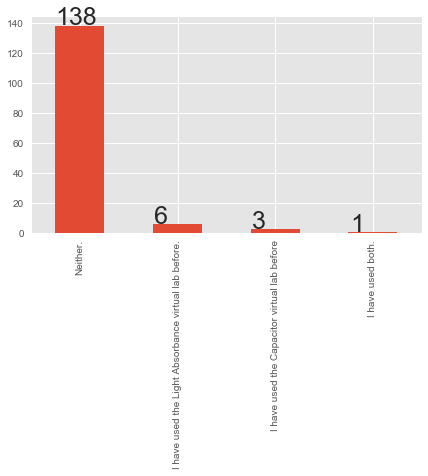

In [15]:
ax = pre_analyzeable['prior_sims_phet'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=25)

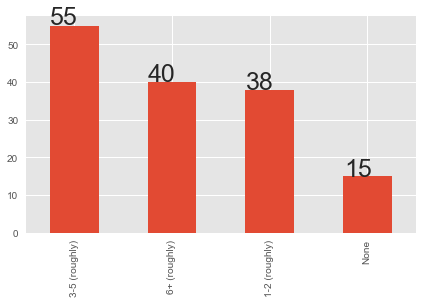

In [16]:
ax = pre_analyzeable['prior_number_virtual_labs'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=25)

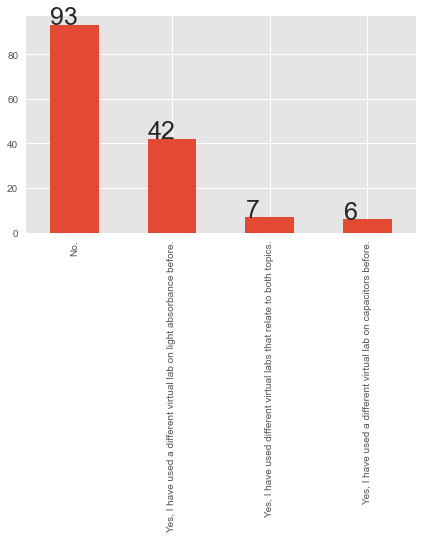

In [17]:
ax = pre_analyzeable['prio_sims_other'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=25)

In [18]:
lab_choices = ['[High school level laboratory]','[First year undergraduate physics laboratory]','[First year undergraduate chemistry laboratory]','[Higher level physics labs]','[Higher level chemistry labs]']
p = []
p.append(lab_choices)
p.append([len(pre_analyzeable[pre_analyzeable['[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. '+choice]==1]) for choice in lab_choices])
print tabulate(p)
# len(pre_analyzeable[pre_analyzeable['[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory]']==1])

------------------------------  ---------------------------------------------  -----------------------------------------------  ---------------------------  -----------------------------
[High school level laboratory]  [First year undergraduate physics laboratory]  [First year undergraduate chemistry laboratory]  [Higher level physics labs]  [Higher level chemistry labs]
126                             116                                            116                                              0                            11
------------------------------  ---------------------------------------------  -----------------------------------------------  ---------------------------  -----------------------------


In [19]:
pre_analyzeable.columns

Index([u'Status', u'Internal ID', u'Language', u'Created At', u'Updated At',
       u'Location', u'Username', u'GET Variables', u'Referrer',
       u'Number of Saves', u'Weighted Score', u'Completion Time',
       u'Page 1 | Time on Page', u'Page 2 | Time on Page', u'IP Address',
       u'Invite Code', u'Invite Email', u'Invite Name', u'Collector', u'id',
       u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory]',
       u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory]',
       u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory]',
       u'[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level physics labs]',
       u'[prior_lab] What lab cou

In [20]:
#Other lab courses taken by students
print  [v for v in pre_analyzeable['prior_lab'].values if str(v) != 'nan']

[u'Chem 154 lab', u'Biology', u'biol 140', u'First year undergraduate biology laboratory ', u'First year undergraduate Computer Science and Astromony laboratory', u'First Year undergraduate CPSC labs', u'Chemistry High School level', u'first year biology lab', u'Computer Science labs', u'Biology 140 Lab Course ', u'Microbiology (High School)', u'Bio 140', u'Music Theory', u'Biology, Computer Science', u'Biology', u'First year Biology Laboratory', u'First Year Undergraduate Biology Lab', u'First year undergraduate biology labratory', u'VISA 110', u'computer science labs', u'High school level biology lab, First year undergraduaute biology lab', u'Biology first year lab', u'First year undergraduate biology lab', u'Biology', u'First year undergraduate biology lab (BIOL 140)', u'Chemistry', u'high school biology lab', u'cpsc 121 and 110 labs', u'Biology labs', u'First year undergraduate biology laboratory', u'economics', u'Frst 443 - ENVI, Bio230/306', u'first year undergrad biology labs', 

## Post surveys

In [21]:
def get_all_posts_surveys():
    df = pd.DataFrame()
    for sim_order in ['Capacitance-assessment-2LC','Absorbance-assessment-1LC','Capacitance-assessment-1CL','Absorbance-assessment-2CL']:
        filename = 'responses_{0}_downloaded_4.3.2017.txt'.format(sim_order)
        filepath = os.path.join(BIG_FOLDER,'raw study data\\survey data\\'+filename)
        newdf = pd.read_csv(filepath,sep='\t',encoding = "ISO-8859-1")
        newdf['sim_index'] = sim_order[-3]

        df = pd.concat([df,newdf])    
    return df
posts = get_all_posts_surveys()
posts.head()

Collector Completion Time        Created At  GET Variables  \
0        NaN         0:10:27  2017-01-13 14:42            NaN   
1        NaN         0:10:50  2017-01-13 14:42            NaN   
2        NaN         0:18:12  2017-01-17 12:34            NaN   
3        NaN         0:14:54  2017-01-17 12:34            NaN   
4        NaN         0:17:06  2017-01-17 12:34            NaN   

        IP Address  Internal ID  Invite Code  Invite Email  Invite Name  \
0  142.103.243.212     83738374          NaN           NaN          NaN   
1  142.103.243.201     83738375          NaN           NaN          NaN   
2  142.103.243.201     83835289          NaN           NaN          NaN   
3  142.103.243.220     83835296          NaN           NaN          NaN   
4  142.103.243.219     83835305          NaN           NaN          NaN   

  Language    ...      \
0  English    ...       
1  English    ...       
2  English    ...       
3  English    ...       
4  English    ...       

  [taskinterpretation.4] In the virtual lab activity I just did, I was asked to... | develop scientific reasoning skills  \
0                                         Definitely                                                                       
1                                         Definitely                                                                       
2                                             Mostly                                                                       
3                                             Mostly                                                                       
4                                         Definitely                                                                       

   [year] What year are you in? [1st year undergraduate]  \
0                                                NaN       
1                                                1.0       
2                                                1.0       
3                                                1.0       
4                                                1.0       

   [year] What year are you in? [2nd year undergraduate]  \
0                                                1.0       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   [year] What year are you in? [3rd year undergraduate]  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   [year] What year are you in? [4th year undergraduate]  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   [year] What year are you in? [5th year undergraduate]  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   [year] What year are you in? [6th year or higher undergraduate]  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 

   [year] What year are you in? [Doctor

In [22]:
#cleaning up columns
old_columns = list(posts.columns)
new_columns = [c.split(']')[0].replace('[','') for c in old_columns]
for i,(c,d) in enumerate(zip(new_columns,old_columns)):
    if new_columns.count(c)>1:
        new_columns[i] = d
posts.columns = new_columns
posts.head(3)

Collector Completion Time        Created At  GET Variables  \
0        NaN         0:10:27  2017-01-13 14:42            NaN   
1        NaN         0:10:50  2017-01-13 14:42            NaN   
2        NaN         0:18:12  2017-01-17 12:34            NaN   

        IP Address  Internal ID  Invite Code  Invite Email  Invite Name  \
0  142.103.243.212     83738374          NaN           NaN          NaN   
1  142.103.243.201     83738375          NaN           NaN          NaN   
2  142.103.243.201     83835289          NaN           NaN          NaN   

  Language    ...     taskinterpretation.4  \
0  English    ...               Definitely   
1  English    ...               Definitely   
2  English    ...                   Mostly   

   [year] What year are you in? [1st year undergraduate]  \
0                                                NaN       
1                                                1.0       
2                                                1.0       

   [year] What year are you in? [2nd year undergraduate]  \
0                                                1.0       
1                                                NaN       
2                                                NaN       

   [year] What year are you in? [3rd year undergraduate]  \
0                                                NaN       
1                                                NaN       
2                                                NaN       

   [year] What year are you in? [4th year undergraduate]  \
0                                                NaN       
1                                                NaN       
2                                                NaN       

   [year] What year are you in? [5th year undergraduate]  \
0                                                NaN       
1                                                NaN       
2                                                NaN       

   [year] What year are you in? [6th year or higher undergraduate]  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 

   [year] What year are you in? [Doctoral student]  year  sim_index  
0                                              NaN   NaN          2  
1                                              NaN   NaN          2  
2                                              NaN   NaN          2  

[3 rows x 103 columns]

In [23]:
ids_posts = list(posts['id'])
posts.shape

(410, 103)

In [24]:
ids = set(get_students_to_analyze_log())

In [25]:
len(ids)

148

In [26]:
print len(ids&set(ids_posts)),"ids in posts and analyzable list"
print  len(ids - set(ids_posts)),"ids not in posts:",ids - set(ids_posts)
print len(set(ids_posts)-ids),"ids not analyzable ids (not worrisome - lots of testing or unusable students)"

146 ids in posts and analyzable list
2 ids not in posts: set([10192168, 10561164])
62 ids not analyzable ids (not worrisome - lots of testing or unusable students)


In [27]:
print "We investigate the two ids missing in posts."
print 561164, 561164 in ids_posts
print list(posts[posts['id']==561164]['Created At'])
print 192168, 192168 in ids_posts
print list(posts[posts['id']==192168]['Created At'])

We investigate the two ids missing in posts.
561164 True
[u'2017-01-19 13:44', u'2017-01-19 14:39']
192168 True
[u'2017-01-20 15:43', u'2017-01-20 16:40']


In [28]:
def ids_posts_to_logs(studentid):
    if studentid in [561164,192168]:
        return studentid+10000000
    else:
        return studentid
ids_match_posts = [ids_posts_to_logs(i) for i in ids_posts]
print len(ids_match_posts)
print len(set(ids_match_posts)&set(ids))

410
148


In [29]:
import collections
weird = [item for item, count in collections.Counter(ids_match_posts).items() if count != 2 and item in ids]
for student in weird:
    if student in ids:
        print student, collections.Counter(ids_match_posts)[student]
        print list(posts[posts['id']==student]['sim_index'])
print "These students are in the logs and surveys, but had the wrong number of postsurveys (should be 2)"

17597160 1
['2']
17868168 1
['2']
36107164 1
['2']
17931169 4
['2', '1', '1', '2']
83145167 1
['1']
These students are in the logs and surveys, but had the wrong number of postsurveys (should be 2)


In [30]:
print 17595160
print list(posts[posts['id']==17595160]['Created At'])
print 17597160
print list(posts[posts['id']==17597160]['Created At'])

17595160
[u'2017-01-20 15:43']
17597160
[u'2017-01-20 16:40']


In [31]:
print 7868168
print list(posts[posts['id']==7868168]['Created At'])
print 17868168
print list(posts[posts['id']==17868168]['Created At'])

7868168
[u'2017-01-19 13:44']
17868168
[u'2017-01-19 14:39']


In [32]:
print 31607164
print list(posts[posts['id']==31607164]['Created At'])
print 36107164
print list(posts[posts['id']==36107164]['Created At'])

31607164
[u'2017-01-17 15:42']
36107164
[u'2017-01-17 16:38']


In [33]:
print "For student 17931169, keep those from session 8, order CL, dump the ones from March 22nd LC whose log data we lost (possible collision?)"
posts[posts['id']==17931169][['id','IP Address','Created At']]

For student 17931169, keep those from session 8, order CL, dump the ones from March 22nd LC whose log data we lost (possible collision?)


id       IP Address        Created At
83  17931169  142.103.243.215  2017-03-22 16:42
86  17931169  142.103.243.215  2017-03-22 15:46
42  17931169  142.103.243.201  2017-01-23 15:41
43  17931169  142.103.243.201  2017-01-23 16:38

In [34]:
print 84135167
print list(posts[posts['id']==84135167]['Created At'])
83145167
print list(posts[posts['id']==83145167]['Created At'])

84135167
[u'2017-01-17 16:39']
[u'2017-01-17 15:42']


In [35]:
def ids_posts_to_logs(row):
    sid = row['id']
    if sid in [561164,192168,7868168]:
        return sid+10000000
    elif sid == 17595160:
        return 17597160
    elif sid == 31607164:
        return 36107164
    elif sid == 17931169:
        if row['IP Address'] == '142.103.243.201':
            return 17931169
        else:
            return 12345678 #cahnge the id so we don't use it
    elif sid == 84135167:
        return 83145167
    else:
        return sid

posts['sid'] = posts.apply(lambda row: ids_posts_to_logs(row),axis=1)

In [36]:
new_ids_posts = list(posts['sid'])
print len(ids&set(new_ids_posts)),"ids in posts and analyzable list"

148 ids in posts and analyzable list


In [37]:
import collections
weird = [item for item, count in collections.Counter(new_ids_posts).items() if count != 2 and item in ids]
print weird
for student in weird:
    if student in ids:
        print student, collections.Counter(new_ids_posts)[student]
        print list(posts[posts['sid']==student]['sim_index'])
print "These students are in the logs and surveys, but had the wrong number of postsurveys (should be 2)"
print "If nothing prints we are golden!"

[]
These students are in the logs and surveys, but had the wrong number of postsurveys (should be 2)
If nothing prints we are golden!
